# Obtener información de un CSV - Análisis de MOTO GP

Para obtener información de un CSV, primero hay que poder manejar archivos

Para esto se utiliza la función `open` la cual permite abrir archivos y gracias al uso de contextos con `with` de python podemos hacer uso del contexto de la función y abrir lo en diferentes modos:
* `r`: para modo lectura
* `w`: para modo escritura
* `a`: para modo añadir
* `b`: para modo escritura de bytes
* `+`: para actualizar (lectura y escritura)

La apertura de fichero nos proporciona un descriptor al cual se le puede pedir datos usando el método `read`, o `write`. [Dcoumentación de open](https://docs.python.org/3/library/functions.html#open)

In [1]:
with open("Clasificacion-actual.csv", "r") as archivo:
    # Lee el contenido del archivo
    contenido = archivo.read()
    # Realiza operaciones con el contenido, por ejemplo, imprimirlo
    print(contenido)


Pos.,Piloto,nombre,constructor,Puntos
1,Italia,Francesco Bagnaia,Ducati,251
2,España,Jorge Martín,Ducati,189
3,Italia,Marco Bezzecchi,Ducati,183
4,Sudáfrica,Brad Binder       ,KTM,160
5,Francia,Johann Zarco,Ducati,125
6,Italia,Luca Marini       ,Ducati,120
7,España,Aleix Espargaró       ,Aprilia,117
8,Australia,Jack Miller,KTM,96
9,España,Álex Márquez       ,Ducati,92
10,España,Maverick Viñales       ,Aprilia,86
11,Francia,Fabio Quartararo       ,Yamaha,73
12,Italia,Franco Morbidelli       ,Yamaha,65
13,España,Augusto Fernández       ,KTM,51
14,España,Alex Rins       ,Honda,47
15,Portugal,Miguel Oliveira       ,Aprilia,40
16,Italia,Fabio Di Giannantonio       ,Ducati,37
17,Japón,Takaaki Nakagami       ,Honda,34
18,Italia,Enea Bastianini       ,Ducati,24
19,España,Marc Márquez       ,Honda,19
20,España,Raúl Fernández       ,Aprilia,14
21,España,Dani Pedrosa       ,KTM,13
22,Italia,Lorenzo Savadori,Aprilia,9
23,Alemania,Jonas Folger       ,KTM,9
24,España,Pol Espargaró,KTM,8
25,España,Jo

Como se puede ver, la lecutra la hace directamente sobre el fichero en tipo texto por defecto

Para poder analizar el contenido deberíamos de ir partiendo cada línea separando por el separador utilizado (en nuestro caso `,`) e ir analizando según la cabecera y según cada línea

In [2]:
from pprint import pprint

idx = 0
contenido = []
cabecera = []
with open("Clasificacion-actual.csv", "r") as archivo:
    for linea in archivo.readlines():
        linea_analizada = linea.split(',')
        contenido.append(linea_analizada)

pprint(contenido)

[['Pos.', 'Piloto', 'nombre', 'constructor', 'Puntos\n'],
 ['1', 'Italia', 'Francesco Bagnaia', 'Ducati', '251\n'],
 ['2', 'España', 'Jorge Martín', 'Ducati', '189\n'],
 ['3', 'Italia', 'Marco Bezzecchi', 'Ducati', '183\n'],
 ['4', 'Sudáfrica', 'Brad Binder       ', 'KTM', '160\n'],
 ['5', 'Francia', 'Johann Zarco', 'Ducati', '125\n'],
 ['6', 'Italia', 'Luca Marini       ', 'Ducati', '120\n'],
 ['7', 'España', 'Aleix Espargaró       ', 'Aprilia', '117\n'],
 ['8', 'Australia', 'Jack Miller', 'KTM', '96\n'],
 ['9', 'España', 'Álex Márquez       ', 'Ducati', '92\n'],
 ['10', 'España', 'Maverick Viñales       ', 'Aprilia', '86\n'],
 ['11', 'Francia', 'Fabio Quartararo       ', 'Yamaha', '73\n'],
 ['12', 'Italia', 'Franco Morbidelli       ', 'Yamaha', '65\n'],
 ['13', 'España', 'Augusto Fernández       ', 'KTM', '51\n'],
 ['14', 'España', 'Alex Rins       ', 'Honda', '47\n'],
 ['15', 'Portugal', 'Miguel Oliveira       ', 'Aprilia', '40\n'],
 ['16', 'Italia', 'Fabio Di Giannantonio       ', 

## Uso de csv

En el build-in podemos encontrar la librería CSV la cual es de gran ayuda para fichero separados por cualquier delimitador [documentación de CSV](https://docs.python.org/3/library/csv.html)

La librería `csv` permite trabajar con ficheros de datos en formato CSV, o valores separados por delimitadores (no solo comas).

Principalmente tiene 4 funciones:
* **csv.reader(descriptor, delimiter=',')**: permite crear un lector de ficheros CSV (se lee haciendo `row in lector`).

```python
import csv
with open('eggs.csv', newline='') as csvfile:
     spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
     for row in spamreader:
         print(', '.join(row))
Spam, Spam, Spam, Spam, Spam, Baked Beans
Spam, Lovely Spam, Wonderful Spam
```

* **csv.write(descriptor, delimiter=',')**: permite crear un escritor de ficheros CSV
* **csv.writerow(iter)**: permite guardar una línea como el iterador.

```python
import csv
with open('eggs.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=' ',
                            quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['Spam'] * 5 + ['Baked Beans'])
    spamwriter.writerow(['Spam', 'Lovely Spam', 'Wonderful Spam'])
```

* **csv.DictReader(descriptor, fieldnames=None)**: permite leer información como diccionario definiendo las claves en fieldnames, sin fieldnames se usa la primera línea como claves del diccionario.

```python
import csv
with open('names.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        print(row['first_name'], row['last_name'])

Eric Idle
John Cleese

print(row)
{'first_name': 'John', 'last_name': 'Cleese'}
```

* **csv.DictWriter(descriptor, fieldnames)**: permite escribir información como diccionarios definiendo las claves en fieldnames, sin fieldnames se usa la primera línea como claves del diccionario.

```python
with open('names.csv', 'w', newline='') as csvfile:
    fieldnames = ['first_name', 'last_name']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    writer.writerow({'first_name': 'Baked', 'last_name': 'Beans'})
    writer.writerow({'first_name': 'Lovely', 'last_name': 'Spam'})
    writer.writerow({'first_name': 'Wonderful', 'last_name': 'Spam'})
```

Más info en: [csv](https://docs.python.org/es/3/library/csv.html)

In [3]:
import csv

with open("Clasificacion-actual.csv", "r", newline="") as archivo:
    lector_csv = csv.reader(archivo)
    for fila in lector_csv:
        # Cada fila es una lista de valores en el archivo CSV
        print(fila)

['Pos.', 'Piloto', 'nombre', 'constructor', 'Puntos']
['1', 'Italia', 'Francesco Bagnaia', 'Ducati', '251']
['2', 'España', 'Jorge Martín', 'Ducati', '189']
['3', 'Italia', 'Marco Bezzecchi', 'Ducati', '183']
['4', 'Sudáfrica', 'Brad Binder       ', 'KTM', '160']
['5', 'Francia', 'Johann Zarco', 'Ducati', '125']
['6', 'Italia', 'Luca Marini       ', 'Ducati', '120']
['7', 'España', 'Aleix Espargaró       ', 'Aprilia', '117']
['8', 'Australia', 'Jack Miller', 'KTM', '96']
['9', 'España', 'Álex Márquez       ', 'Ducati', '92']
['10', 'España', 'Maverick Viñales       ', 'Aprilia', '86']
['11', 'Francia', 'Fabio Quartararo       ', 'Yamaha', '73']
['12', 'Italia', 'Franco Morbidelli       ', 'Yamaha', '65']
['13', 'España', 'Augusto Fernández       ', 'KTM', '51']
['14', 'España', 'Alex Rins       ', 'Honda', '47']
['15', 'Portugal', 'Miguel Oliveira       ', 'Aprilia', '40']
['16', 'Italia', 'Fabio Di Giannantonio       ', 'Ducati', '37']
['17', 'Japón', 'Takaaki Nakagami       ', 'Honda

In [4]:
import csv

pilotos = []

with open("Clasificacion-actual.csv", "r", newline="") as archivo:
    lector_csv = csv.DictReader(archivo)
    for fila in lector_csv:
        fila['nombre'] = fila['nombre'].strip()
        pilotos.append(fila)
pilotos

[{'Pos.': '1',
  'Piloto': 'Italia',
  'nombre': 'Francesco Bagnaia',
  'constructor': 'Ducati',
  'Puntos': '251'},
 {'Pos.': '2',
  'Piloto': 'España',
  'nombre': 'Jorge Martín',
  'constructor': 'Ducati',
  'Puntos': '189'},
 {'Pos.': '3',
  'Piloto': 'Italia',
  'nombre': 'Marco Bezzecchi',
  'constructor': 'Ducati',
  'Puntos': '183'},
 {'Pos.': '4',
  'Piloto': 'Sudáfrica',
  'nombre': 'Brad Binder',
  'constructor': 'KTM',
  'Puntos': '160'},
 {'Pos.': '5',
  'Piloto': 'Francia',
  'nombre': 'Johann Zarco',
  'constructor': 'Ducati',
  'Puntos': '125'},
 {'Pos.': '6',
  'Piloto': 'Italia',
  'nombre': 'Luca Marini',
  'constructor': 'Ducati',
  'Puntos': '120'},
 {'Pos.': '7',
  'Piloto': 'España',
  'nombre': 'Aleix Espargaró',
  'constructor': 'Aprilia',
  'Puntos': '117'},
 {'Pos.': '8',
  'Piloto': 'Australia',
  'nombre': 'Jack Miller',
  'constructor': 'KTM',
  'Puntos': '96'},
 {'Pos.': '9',
  'Piloto': 'España',
  'nombre': 'Álex Márquez',
  'constructor': 'Ducati',
  '

## Ejercicio 1 

Definir una función que obtenga los nombres y las posiciones de los pilotos analizando el CSV (Clasificacion-actual.csv)

In [5]:
import csv

def obtener_pilotos():
    pilotos = []
    
    with open("Clasificacion-actual.csv", "r", newline="") as archivo:
        lector_csv = csv.DictReader(archivo)
        for fila in lector_csv:
            fila['nombre'] = fila['nombre'].strip()
            pilotos.append(fila)
    return pilotos

In [6]:
for piloto in obtener_pilotos():
    print(piloto['nombre'], piloto['Pos.'])

Francesco Bagnaia 1
Jorge Martín 2
Marco Bezzecchi 3
Brad Binder 4
Johann Zarco 5
Luca Marini 6
Aleix Espargaró 7
Jack Miller 8
Álex Márquez 9
Maverick Viñales 10
Fabio Quartararo 11
Franco Morbidelli 12
Augusto Fernández 13
Alex Rins 14
Miguel Oliveira 15
Fabio Di Giannantonio 16
Takaaki Nakagami 17
Enea Bastianini 18
Marc Márquez 19
Raúl Fernández 20
Dani Pedrosa 21
Lorenzo Savadori 22
Jonas Folger 23
Pol Espargaró 24
Joan Mir 25
Michele Pirro 26
Danilo Petrucci 27
Stefan Bradl 28
Iker Lecuona Gascón 29


## Ejercicio 2

Analizar y obtener los datos de los pilotos en el archivo de "Clasificaciones por cada gran premio.csv"

In [7]:
import csv

def obtener_clasificaciones():
    resultados = []
    
    with open("Clasificaciones por cada gran premio.csv", "r", newline="") as archivo:
        lector_csv = csv.DictReader(archivo)
        for fila in lector_csv:
            resultados.append(fila)
    return resultados

In [8]:
from pprint import pprint

pprint(obtener_clasificaciones())

[{'Alemania': '29',
  'Argentina': '4',
  'Australia': '-',
  'Austria': '37',
  'España': '34',
  'España_Jerez': '-',
  'España_cataluña': '0',
  'Estados Unidos': '12',
  'Francia': '7',
  'Gran Bretaña': '20',
  'India': '-',
  'Indonesia': '-',
  'Italia': '37',
  'Japón': '-',
  'Malasia': '-',
  'Nombre': 'Francesco Bagnaia',
  'Países Bajos': '34',
  'Portugal': '37',
  'Posicion': '1º',
  'Puntuación': '251',
  'Qatar': '-',
  'San Marino': '-',
  'Tailandia': '-'},
 {'Alemania': '37',
  'Argentina': '13',
  'Australia': '-',
  'Austria': '16',
  'España': '19',
  'España_Jerez': '-',
  'España_cataluña': '0',
  'Estados Unidos': '7',
  'Francia': '32',
  'Gran Bretaña': '14',
  'India': '-',
  'Indonesia': '-',
  'Italia': '27',
  'Japón': '-',
  'Malasia': '-',
  'Nombre': 'Jorge Martín',
  'Países Bajos': '15',
  'Portugal': '9',
  'Posicion': '2º',
  'Puntuación': '189',
  'Qatar': '-',
  'San Marino': '-',
  'Tailandia': '-'},
 {'Alemania': '16',
  'Argentina': '34',
  'A

## Ejercicio 3

Crear una función que con el nombre de un piloto devuelva un diccionario con los resultados del piloto en todos los grandes premios

In [9]:
def obtener_clasificacion_piloto(nombre_piloto):
    for clasificacion in obtener_clasificaciones():
        if clasificacion['Nombre'] == nombre_piloto:
            return clasificacion

In [10]:
# print(pilotos)
nombre_piloto = 'Jorge Martín'

obtener_clasificacion_piloto(nombre_piloto)


{'Posicion': '2º',
 'Nombre': 'Jorge Martín',
 'Puntuación': '189',
 'Portugal': '9',
 'Argentina': '13',
 'Estados Unidos': '7',
 'España': '19',
 'Francia': '32',
 'Italia': '27',
 'Alemania': '37',
 'Países Bajos': '15',
 'Gran Bretaña': '14',
 'Austria': '16',
 'España_cataluña': '0',
 'San Marino': '-',
 'India': '-',
 'Japón': '-',
 'Indonesia': '-',
 'Australia': '-',
 'Tailandia': '-',
 'Malasia': '-',
 'Qatar': '-',
 'España_Jerez': '-'}

## Ejercicio 4

Pintar los resultados de varios pilotos según los resultados usando las funciones de Gráficos en jupyter

In [11]:
import matplotlib.pyplot as plt

def pintar_grafico(datos_x, datos_y, colores, tooltips=None, title_x='Datos en el Eje X', title_y='Datos en el Eje Y', title='Gráfico Personalizado'):
    """
    Crea un gráfico personalizado con datos en el eje X y en el eje Y, colores personalizados y tooltips.

    :param datos_x: Un diccionario donde las claves son las etiquetas y los valores son listas de datos en el eje X.
    :param datos_y: Un diccionario donde las claves son las etiquetas y los valores son listas de datos en el eje Y.
    :param colores: Un diccionario que asigna colores a cada serie.
    :param tooltips: Un diccionario que asigna tooltips a cada punto de datos.
    """
    fig, ax = plt.subplots()

    for etiqueta in datos_x.keys():
        if etiqueta in colores:
            color = colores[etiqueta]
        else:
            color = 'blue'  # Color predeterminado si no se especifica

        if etiqueta in tooltips:
            texto_tooltip = tooltips[etiqueta]
        else:
            texto_tooltip = None

        ax.plot(datos_x[etiqueta], datos_y[etiqueta], label=etiqueta, color=color, marker='o', linestyle='-')

        if texto_tooltip:
            for x, y, tooltip in zip(datos_x[etiqueta], datos_y[etiqueta], texto_tooltip):
                ax.annotate(f'{tooltip}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')

    # Personalización del gráfico
    ax.set_xlabel(title_x)
    ax.set_ylabel(title_y)
    ax.set_title(title)
    #ax.set_xticklabels(ax.get_xticks(), rotation=45)
    ax.legend()
    plt.grid(True)
    plt.xticks(rotation=45)

    plt.show()

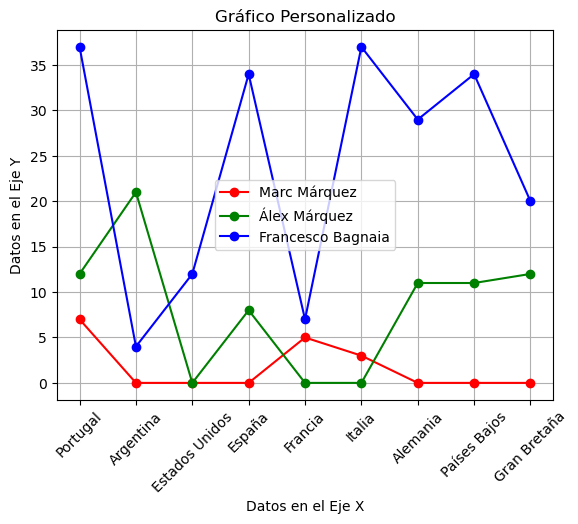

In [12]:
piloto_1 = 'Marc Márquez'
piloto_2 = 'Álex Márquez'
piloto_3 = 'Francesco Bagnaia'

pilotos = [piloto_1, piloto_2, piloto_3]
valores_x = ['Portugal', 'Argentina', 'Estados Unidos', 'España', 'Francia', 'Italia', 'Alemania', 'Países Bajos', 'Gran Bretaña']

datos_x = {nombre_piloto: valores_x for nombre_piloto in pilotos}

datos_y = {nombre_piloto: [] for nombre_piloto in pilotos}

for nombre_piloto, valores_piloto in datos_y.items():
    resultados_piloto = obtener_clasificacion_piloto(nombre_piloto)
    for gp in valores_x:
        puntuacion = resultados_piloto[gp]
        if puntuacion == '-':
            puntuacion = '0'
        valores_piloto.append(int(puntuacion))

colores = {nombre_piloto: color for nombre_piloto, color in zip(pilotos, ['red', 'green', 'blue'])}
tooltips = []
pintar_grafico(datos_x, datos_y, colores, tooltips)


## Ejercicio 5

Obtener la media de puntos obtenidas por cada contructor (Honda, Ducati, KTM, etc)

## Ejercicio 6

Obtener la mediana de los puntos obtenidos según cada país (nacionalidad)

## Otros ejercicios extra

Desde el archivo guardado en CSV analizar la información
* Obtener medias
* Obtener percentiles
* Unir la información de la nacionalidad de cada piloto en un mismo CSV
* Agrupar por constructores
* Filtrar por países
* Actualizar el contenido de nuevos campeonatos e ir añadiendo en el CSV
* Que circuitos tienen más accidentes
* En qué circuitos destacan los españoles
* Que circuitos son mejores para Honda, o para KTM
* Influye la longitud del nombre en ser más ganador?
* Influye el número de vocales en que tengas mas o menos puntos?
* Obtener la lista de los pilotos de Italia
* Y ordenarlos por sus puntos
* Filtrar la lista por pilotos que corran con un constructor que tenga la letra a (mayuscula o minuscula), mostrando los nombres
* Actualizar CSV de clasificación actual y de cada campeonato
* Ejercicio pintar los top 5 pilotos de moto GP desde un archivo CSV
* Obtener los top pilotos por país
* Sacar los top pilotos por constructores
* Obtener los 3 pilotos con más podios
* Sacar la suma de puntos por constructores
* Sacar la media de triunfos por constructores
* Podríamos dar una distribución de cómo tiene que quedar cada jugador para poder ganar?
* Podríamos saber qué jugadores ya es imposible que ganen?
* Podríamos calcular el efecto "correr en casa" comprobando si la media de los puntos aumenta al correr en su propio país? (por cada piloto)
